In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

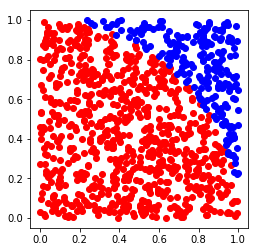

Estimated area: 0.77900000
True area: 0.78539816
Error: -0.8146 %


In [66]:
# Warm-up: area of quadrant of the unit circle
N = 1000
X = np.random.random(N)
Y = np.random.random(N)
X_in, X_out, Y_in, Y_out = [], [], [], []
for x, y in zip(X, Y):
    if x**2 + y**2 < 1:
        X_in.append(x)
        Y_in.append(y)
    else:
        X_out.append(x)
        Y_out.append(y)

plt.plot(X_in, Y_in, 'ro')
plt.plot(X_out, Y_out, 'bo')
plt.axis('scaled')
plt.show()

inPortion = len(X_in)/(len(X_in) + len(X_out))
plotArea = 1
areaEstimate = inPortion*plotArea
trueArea = math.pi/4
pctError = 100*((areaEstimate - trueArea)/trueArea)
print('Estimated area: {0:.8f}'.format(areaEstimate))
print('True area: {0:.8f}'.format(trueArea))
print('Error: {0:.4f} %'.format(pctError))

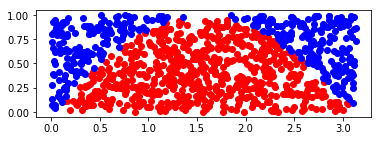

Estimated area: 1.98862815
True area: 2.00000000
Error: -0.5686 %


In [68]:
# Area under sine curve
N = 1000
X = np.random.random(N)*math.pi
Y = np.random.random(N)
X_in, X_out, Y_in, Y_out = [], [], [], []
for x, y in zip(X, Y):
    if y < math.sin(x):
        X_in.append(x)
        Y_in.append(y)
    else:
        X_out.append(x)
        Y_out.append(y)

plt.plot(X_in, Y_in, 'ro')
plt.plot(X_out, Y_out, 'bo')
plt.axis('scaled')
plt.show()

inPortion = len(X_in)/(len(X_in) + len(X_out))
plotArea = math.pi
areaEstimate = inPortion*plotArea
trueArea = 2
pctError = 100*((areaEstimate - trueArea)/trueArea)
print('Estimated area: {0:.8f}'.format(areaEstimate))
print('True area: {0:.8f}'.format(trueArea))
print('Error: {0:.4f} %'.format(pctError))

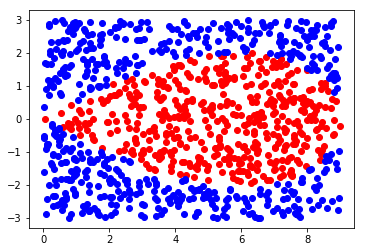

Estimated area: 25.43400000
True area: 24.94153163
Error: 1.9745 %


In [71]:
# Area inside loop of Tschirnhausen cubic
N = 1000
xlim = (0, 9)
ylim = (-3, 3)
X = xlim[0] + np.random.random(N)*(xlim[1] - xlim[0])
Y = ylim[0] + np.random.random(N)*(ylim[1] - ylim[0])
X_in, X_out, Y_in, Y_out = [], [], [], []
for x, y in zip(X, Y):
    if y**2 < (9*x**2 - x**3)/27:
        X_in.append(x)
        Y_in.append(y)
    else:
        X_out.append(x)
        Y_out.append(y)

plt.plot(X_in, Y_in, 'ro')
plt.plot(X_out, Y_out, 'bo')
plt.axis('scaled')
plt.show()

inPortion = len(X_in)/(len(X_in) + len(X_out))
plotArea = (xlim[1] - xlim[0])*(ylim[1] - ylim[0])
areaEstimate = inPortion*plotArea
trueArea = 72*math.sqrt(3)/5
pctError = 100*((areaEstimate - trueArea)/trueArea)
print('Estimated area: {0:.8f}'.format(areaEstimate))
print('True area: {0:.8f}'.format(trueArea))
print('Error: {0:.4f} %'.format(pctError))

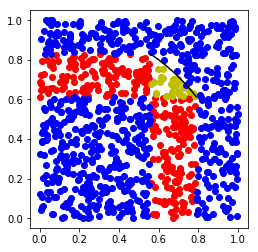

Estimated area: 0.33000000
True area: 0.32124163
Error: 2.7264 %


In [70]:
# Sum of areas traced by projecting an arc of the unit circle to both axes (equals arc length)

# Defining the arc
s_y1, s_y2 = np.random.random(), np.random.random()
while s_y2 - s_y1 < 0.05:
    s_y1, s_y2 = np.random.random(), np.random.random()
s_x1, s_x2 = math.sqrt(1 - s_y1**2), math.sqrt(1 - s_y2**2)
X_arc = [s_x1 + (i/100)*(s_x2 - s_x1) for i in range(101)]
Y_arc = [math.sqrt(1 - x**2) for x in X_arc]
def inArea1(x):
    # note: since y_1 < y_2, x_2 < x_1
    return (s_x2 < x and x < s_x1)
def inArea2(y):
    return (s_y1 < y and y < s_y2)

# Sampling
N = 1000
xlim = (0, 1)
ylim = (0, 1)
X = xlim[0] + np.random.random(N)*(xlim[1] - xlim[0])
Y = ylim[0] + np.random.random(N)*(ylim[1] - ylim[0])
X_area1, X_area2, X_both, X_out = [], [], [], []
Y_area1, Y_area2, Y_both, Y_out = [], [], [], []
for x, y in zip(X, Y):
    if x**2 + y**2 < 1:
        if inArea1(x) and inArea2(y):
            X_both.append(x)
            Y_both.append(y)
        elif inArea1(x):
            X_area1.append(x)
            Y_area1.append(y)
        elif inArea2(y):
            X_area2.append(x)
            Y_area2.append(y)
        else:
            X_out.append(x)
            Y_out.append(y)
    else:
        X_out.append(x)
        Y_out.append(y)

plt.plot(X_area1, Y_area1, 'ro')
plt.plot(X_area2, Y_area2, 'ro')
plt.plot(X_both, Y_both, 'yo')
plt.plot(X_out, Y_out, 'bo')
plt.plot(X_arc, Y_arc, 'black')
plt.axis('scaled')
plt.show()

inAreas = (len(X_area1)/N, len(X_area2)/N, 2*len(X_both)/N)
plotArea = (xlim[1] - xlim[0])*(ylim[1] - ylim[0])
areaEstimate = sum([area*plotArea for area in inAreas])
trueArea = math.atan(s_y2/s_x2) - math.atan(s_y1/s_x1) ### probly error here
pctError = 100*((areaEstimate - trueArea)/trueArea)
print('Estimated area: {0:.8f}'.format(areaEstimate))
print('True area: {0:.8f}'.format(trueArea))
print('Error: {0:.4f} %'.format(pctError))

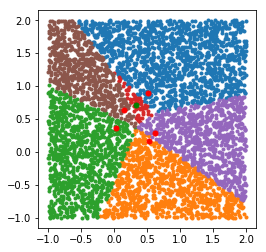

Point ({1:.3f}, {2:.3f}), cell area: inf
Point ({1:.3f}, {2:.3f}), cell area: inf
Point ({1:.3f}, {2:.3f}), cell area: inf
Point (0.327, 0.714), estimated cell area: 0.11340000
Point ({1:.3f}, {2:.3f}), cell area: inf
Point ({1:.3f}, {2:.3f}), cell area: inf

Note: sometimes the area of a finite cell extends beyond the boundary of the graph.
In this case, the area estimated is only the part contained within the boundary of
the graph - NOT the full area of the cell.


In [26]:
# Voronoi partitions

# Some structures to determine which cells are finite
class RelativePoint:
    def __init__(self, base, point):
        self.base = base
        self.point = point
        x, y = point[0] - base[0], point[1] - base[1]
        self.relativeCoords = (x, y)
        if x > 0 and y >= 0:
            self.relativeQuadrant = 1
        elif x <= 0 and y > 0:
            self.relativeQuadrant = 2
        elif x < 0 and y <= 0:
            self.relativeQuadrant = 3
        else:
            self.relativeQuadrant = 4
        if abs(x) > 10**(-6):
            self.relativeSlope = y/x
        else:
            if self.relativeQuadrant in [1, 3]:
                self.relativeSlope = float('inf')
            else:
                self.relativeSlope = -float('inf')
    
    def __lt__(self, other):
        """Return true if angle from base to self.point < angle from base to other.point"""
        if self.base != other.base:
            raise ValueError('Can only compare RelativePoints with the same base')
        if self.relativeQuadrant != other.relativeQuadrant:
            return self.relativeQuadrant < other.relativeQuadrant
        sm, om = self.relativeSlope, other.relativeSlope
        if sm != om:
            return sm < om
        q = self.relativeQuadrant
        if q in [1, 2]:
            return self.point[0] > other.point[0]
        return self.point[0] < other.point[0]
    
    def greaterThanHalfPlane(self, other):
        """Return true if angle defined by self, base, other is greater than pi radians"""
        sq, oq = self.relativeQuadrant, other.relativeQuadrant
        if sq > 2:
            return False
        if oq < sq + 2:
            return False
        if oq > sq + 2:
            return True
        # If reach this point, then sq in [1, 2] and oq == sq + 2
        # Hence, either sq==1 and oq==3, or sq==2 and oq==4
        if sq == 1:
            return other.relativeSlope > self.relativeSlope
        return 

# Define points, tolerance for lines between cells 
N_points = 6
tolerance = 0.01
Voronoi_points_X = [np.random.random() for i in range(N_points)]
Voronoi_points_Y = [np.random.random() for i in range(N_points)]
Voronoi_points = list(zip(Voronoi_points_X, Voronoi_points_Y))
def distance(p, q):
    return math.sqrt((q[0]-p[0])**2 + (q[1]-p[1])**2)
def onLine(p, a, b):
    """Check if p is on the Voronoi line segment between a and b"""
    if a[0] == b[0]:
        return abs(p[1] - a[1]) < tolerance and abs(b[1] - p[1]) < tolerance
    m = (b[1] - a[1])/(b[0] - a[0])
    x = (p[1] - a[1] + m*a[0] + p[0]/m)/(m + 1/m)
    y = a[1] + m*(x - a[0])
    
    da = distance((x,y), a)
    db = distance((x,y), b)
    dseg = distance(a, b)
    if da > dseg or db > dseg:
        return False
    return abs(da - dseg/2) < tolerance and abs(db - dseg/2) < tolerance

# Determine which cells have finite area
isFiniteList = []
for B in Voronoi_points:
    relativePoints = [RelativePoint(B, q) for q in Voronoi_points if q != B]
    determinedFinite = False
    for P in relativePoints:
        relativePointsMinusP = [rp for rp in relativePoints if rp.point != P.point]
        for Q in relativePointsMinusP:
            Px, Py = P.relativeCoords
            Qx, Qy = Q.relativeCoords
            mp, mq = P.relativeSlope, Q.relativeSlope
            if Qy > mp*Qx and Py > mq*Px:
                inHalfPlaneIntersection = lambda R: (
                    R.relativeCoords[1] < mp*R.relativeCoords[0] and R.relativeCoords[1] < mq*R.relativeCoords[0]
                )
            elif Qy > mp*Qx and Py < mq*Px:
                inHalfPlaneIntersection = lambda R: (
                    R.relativeCoords[1] < mp*R.relativeCoords[0] and R.relativeCoords[1] > mq*R.relativeCoords[0]
                )
            elif Qy < mp*Qx and Py > mq*Px:
                inHalfPlaneIntersection = lambda R: (
                    R.relativeCoords[1] > mp*R.relativeCoords[0] and R.relativeCoords[1] < mq*R.relativeCoords[0]
                )
            elif Qy < mp*Qx and Py < mq*Px:
                inHalfPlaneIntersection = lambda R: (
                    R.relativeCoords[1] > mp*R.relativeCoords[0] and R.relativeCoords[1] > mq*R.relativeCoords[0]
                )
            relativePointsMinusPQ = [rp for rp in relativePointsMinusP if rp.point != Q.point]
            for R in relativePointsMinusPQ:
                if inHalfPlaneIntersection(R):
                    isFiniteList.append(True)
                    determinedFinite = True
                    break # exit R loop
            if determinedFinite:
                break # exit Q loop
        if determinedFinite:
            break # exit P loop
    if not determinedFinite:
        isFiniteList.append(False)

# Sample
N = 5000
xlim = (-1, 2)
ylim = (-1, 2)
X = xlim[0] + np.random.random(N)*(xlim[1] - xlim[0])
Y = ylim[0] + np.random.random(N)*(ylim[1] - ylim[0])
X_cells = {(x,y): [] for x,y in Voronoi_points}
Y_cells = {(x,y): [] for x,y in Voronoi_points}
for p in zip(X, Y):
    a, b = sorted(Voronoi_points, key=lambda x: distance(x, p))[:2]
    X_cells[a].append(p[0])
    Y_cells[a].append(p[1])

# Plot
for p in Voronoi_points:
    plt.plot(X_cells[p], Y_cells[p], 'o', markersize=3)
finite_Voronoi_points = [p for p, isFinite in zip(Voronoi_points, isFiniteList) if isFinite]
inf_Voronoi_points = [p for p, isFinite in zip(Voronoi_points, isFiniteList) if not isFinite]
plt.plot(
    [p[0] for p in finite_Voronoi_points], 
    [p[1] for p in finite_Voronoi_points], 
    'go', markersize=5
)
plt.plot(
    [p[0] for p in inf_Voronoi_points], 
    [p[1] for p in inf_Voronoi_points], 
    'ro', markersize=5
)
plt.axis('scaled')
plt.show()

# Compute area estimates
plotArea = (xlim[1] - xlim[0])*(ylim[1] - ylim[0])
for p, isFinite in zip(Voronoi_points, isFiniteList):
    inPortion = len(X_cells[p])/N
    areaEstimate = inPortion*plotArea
    if isFinite:
        print('Point ({1:.3f}, {2:.3f}), estimated cell area: {0:.8f}'.format(areaEstimate, p[0], p[1]))
    else:
        print('Point ({1:.3f}, {2:.3f}), cell area: inf')
        
print('\n'.join([
    '\nNote: sometimes the area of a finite cell extends beyond the boundary of the graph.',
    'In this case, the area estimated is only the part contained within the boundary of',
    'the graph - NOT the full area of the cell.'
]))